In [1]:
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
DATADIR="D:\machine learning\Devanagari\Train"
CATAGORIES=["character_1_ka","character_2_kha","character_3_ga","character_4_gha","character_5_kna",
            "character_6_cha","character_7_chha","character_8_ja","character_9_jha","character_10_yna","character_11_taamatar","character_12_thaa","character_13_daa","character_14_dhaa","character_15_adna","character_16_tabala","character_17_tha","character_18_da","character_19_dha","character_20_na","character_21_pa","character_22_pha","character_23_ba","character_24_bha","character_25_ma","character_26_yaw","character_27_ra","character_28_la","character_29_waw","character_30_motosaw","character_31_petchiryakha","character_32_patalosaw","character_33_ha","character_34_chhya","character_35_tra","character_36_gya","digit_1","digit_2","digit_3","digit_4","digit_5","digit_6","digit_7","digit_8","digit_9"]

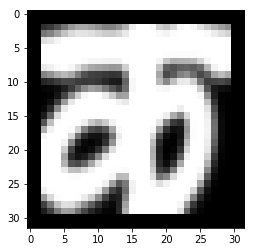

In [3]:
for catagories in CATAGORIES:
    path=os.path.join(DATADIR,catagories)
    
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(image,cmap="gray")
        plt.show
        break
    break    

In [4]:
IMG_SIZE=32


In [5]:
dataset=[]
def create_training_data():
    for catagories in CATAGORIES:
        path=os.path.join(DATADIR,catagories)
        class_num=CATAGORIES.index(catagories)
        for img in os.listdir(path):
            image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
            dataset.append([new_array,class_num])
            
create_training_data()            

In [6]:
print(len(dataset))

76500


In [7]:
import random

In [8]:
random.shuffle(dataset)

In [9]:
#for sample in dataset:
    #print(sample[0])

In [10]:
X=[]
Y=[]

for feature ,label in dataset:
    X.append(feature)
    Y.append(label)
    

In [11]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [12]:
X.shape

(76500, 32, 32, 1)

In [13]:
#import pickle

In [84]:
#pickle_out=open("z.pickle","wb")
#pickle.dump(X,pickle_out)
#pickle_out.close()

In [85]:
#pickle_out=open("t.pickle","wb")
#pickle.dump(Y,pickle_out)
#pickle_out.close()

In [86]:
#pickle_in=open("z.pickle","rb")
#Z=pickle.load(pickle_in)

In [87]:
#pickle_in=open("t.pickle","rb")
#T=pickle.load(pickle_in)

In [89]:
#print(Z.shape)

(229500, 32, 32, 1)


In [83]:
#print(len(Y))

76500


In [22]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#Y= labelencoder.fit_transform(Y)

In [23]:
Y

array([30, 33, 30, ..., 25, 13, 30], dtype=int64)

In [24]:
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

Using TensorFlow backend.


In [25]:
Y=to_categorical(Y)

In [26]:
Y.shape

(76500, 45)

In [27]:
X.shape

(76500, 32, 32, 1)

In [28]:
X=X/255

In [35]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,MaxPool2D,Dropout
model=Sequential()

In [39]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(45, activation = "softmax"))

In [40]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.fit(X,Y, batch_size = 32, epochs =3)

Epoch 1/3
76500/76500 [==============================] - 1062s 14ms/step - loss: 3.8072 - acc: 0.0212
Epoch 2/3
76500/76500 [==============================] - 1005s 13ms/step - loss: 3.8071 - acc: 0.0213
Epoch 3/3
76500/76500 [==============================] - 1182s 15ms/step - loss: 3.8071 - acc: 0.0214
